In [ ]:
# Step 1: Setting Up the Environment in Google Colab

!pip install tensorflow numpy matplotlib seaborn scikit-learn


In [ ]:
# Step 2: Data Preprocessing
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
#Loading CIFAR-10 Dataset
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()



In [ ]:
from tensorflow.keras.utils import to_categorical

# Normalize images to [0,1] range
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [ ]:
#Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20, width_shift_range=0.2,
    height_shift_range=0.2, horizontal_flip=True
)
datagen.fit(X_train)


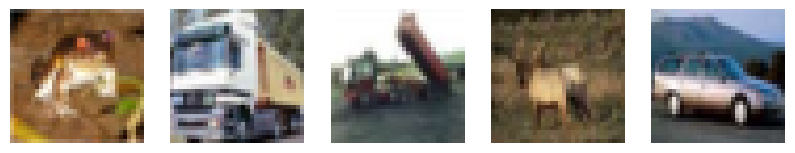

In [ ]:
# Visualizing Sample Images
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i in range(5):
    axes[i].imshow(X_train[i])
    axes[i].axis("off")
plt.show()


In [ ]:
# Step 3: Building the CNN Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Define improved CNN model with regularization
model = Sequential([
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2,2),
    Dropout(0.3),  # Increased Dropout

    Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2,2),
    Dropout(0.4),  # Increased Dropout

    Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2,2),
    Dropout(0.5),  # Increased Dropout

    Flatten(),
    Dense(1024, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),  # Increased Dropout
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile model with lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0003),  # Reduced LR
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1024)                │       4,195,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,352,778 (20.42 MB)

 Trainable params: 5,351,882 (20.42 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
# Step 4: Model Training

from tensorflow.keras.callbacks import ReduceLROnPlateau

# Adjust ReduceLROnPlateau for better optimization
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', patience=5, factor=0.5, verbose=1)

# Train the improved CNN model with a larger batch size
history = model.fit(datagen.flow(X_train, y_train, batch_size=128),
                    epochs=50,  # Increased epochs
                    validation_data=(X_test, y_test),
                    callbacks=[lr_scheduler])


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 82ms/step - accuracy: 0.2338 - loss: 4.5995 - val_accuracy: 0.1255 - val_loss: 5.1842 - learning_rate: 3.0000e-04
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accuracy: 0.3956 - loss: 3.3902 - val_accuracy: 0.3579 - val_loss: 3.3178 - learning_rate: 3.0000e-04
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accuracy: 0.4773 - loss: 2.7392 - val_accuracy: 0.4389 - val_loss: 2.7528 - learning_rate: 3.0000e-04
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.5340 - loss: 2.2733 - val_accuracy: 0.5008 - val_loss: 2.2447 - learning_rate: 3.0000e-04
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accuracy: 0.5844 - loss: 1.9370 - val_accuracy: 0.4890 - val_loss: 2.1429 - learning_rate: 3.0000e-04
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accuracy: 0.6200 - loss: 1.7162 - val_accuracy: 0.6196 - val_loss: 1.6444 - learning_rate: 3.0000e-04
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accurac

In [ ]:
model.save("model_5.h5")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8905 - loss: 0.5614
Improved CNN Model Test Accuracy: 0.8885


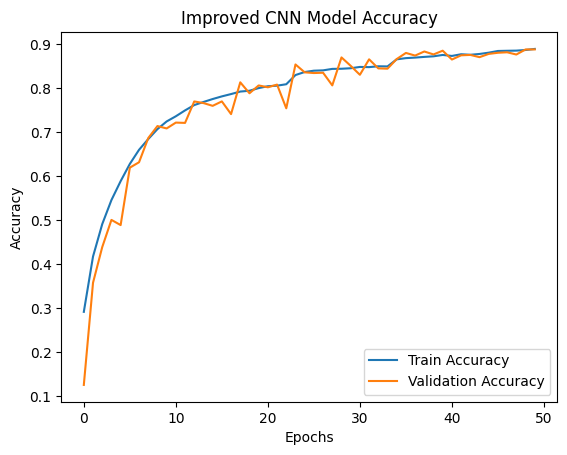

In [ ]:
# Step 5: Model Evaluation

# Evaluate the improved CNN model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Improved CNN Model Test Accuracy: {test_acc:.4f}")

# Plot accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Improved CNN Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model

# Load the model from your Google Drive
model_path = "/content/drive/My Drive/Colab Notebooks/MODEL_5_FOLDER/model_5.h5"
model = load_model(model_path)

print("Model loaded successfully!")


Model loaded successfully!


In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize images to [0,1] range
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Dataset reloaded successfully!")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Dataset reloaded successfully!


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


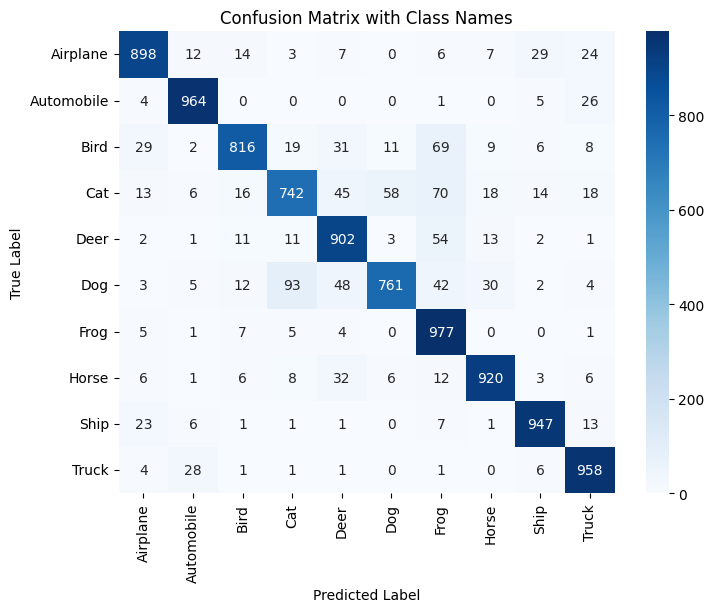

In [ ]:
# Step 6: Confusion Matrix

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# CIFAR-10 class labels
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
               "Dog", "Frog", "Horse", "Ship", "Truck"]

# Generate confusion matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix with class names
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix with Class Names")
plt.show()



In [ ]:
# Evaluate transfer learning model
transfer_test_loss, transfer_test_acc = transfer_model.evaluate(X_test, y_test)
print(f"Transfer Learning Model Test Accuracy: {transfer_test_acc:.4f}")


In [ ]:
# Evaluate CNN Model
cnn_loss, cnn_acc = model.evaluate(X_test, y_test)
print(f"Original CNN Model Test Accuracy: {cnn_acc:.4f}")

# Evaluate Transfer Learning Model
transfer_loss, transfer_acc = transfer_model.evaluate(X_test, y_test)
print(f"Transfer Learning Model Test Accuracy: {transfer_acc:.4f}")
